# Climate change's impact on marine food webs
### Tyler Kloster, Hana Burroughs
  
Expanding on a paper by Kortsh et. all,  
https://royalsocietypublishing.org/doi/10.1098/rspb.2015.1546#d1e354

In [77]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pylab as plt
import math
import random
import statistics

In [2]:
# networkx dosen't accept xlsx format, so first import into a pandas dataframe to work with

dataTitle = 'Boreal_and_Arctic_food_webs_of_the_Barents_Sea.xlsx'
excel = pd.ExcelFile(dataTitle)
borealWeb = pd.read_excel(excel, 'The Boreal food web of the BS')
arcticWeb = pd.read_excel(excel, 'The Arctic food web of the BS')

In [3]:
borealLabels = borealWeb.columns.tolist()
arcticLabels = arcticWeb.columns.tolist()

borealNames = list(borealWeb.iloc[:, 0])
arcticNames = list(arcticWeb.iloc[:, 0])

borealSize = borealWeb.shape
arcticSize = arcticWeb.shape

In [4]:
print(borealWeb.iloc[0, 2])

0


In [5]:
borealAdjacency = [[] for x in range(borealSize[0])]
arcticAdjacency = [[] for x in range(arcticSize[0])]
for i in range(borealSize[0]):
    for j in range(2, borealSize[1]):
        borealAdjacency[i].append(borealWeb.iloc[i, j])
for i in range(arcticSize[0]):
    for j in range(2, arcticSize[1]):
        arcticAdjacency[i].append(arcticWeb.iloc[i, j])

In [6]:
borealAdjacencySym = [[] for x in range(borealSize[0])]
arcticAdjacencySym = [[] for x in range(arcticSize[0])]
for i in range(borealSize[0]):
    for j in range(borealSize[0]):
        borealAdjacencySym[i].append((1 / 2) * (borealAdjacency[i][j] + borealAdjacency[j][i]))
for i in range(arcticSize[0]):
    for j in range(arcticSize[0]):
        arcticAdjacencySym[i].append((1 / 2) * (arcticAdjacency[i][j] + arcticAdjacency[j][i]))

In [7]:
# Dictionaries to make transfering from scientific names to the shortened label

borealNameToLabel = {}
arcticNameToLabel = {}
for i in range(len(borealNames)):
    borealNameToLabel[borealNames[i]] = borealLabels[i + 2]
for i in range(len(arcticNames)):
    arcticNameToLabel[arcticNames[i]] = arcticLabels[i + 2]

In [8]:
# Double checking all species were loaded (Paper cites 233 unique species)

uniqueNames = borealLabels.copy()[2:]
for i in arcticLabels:
    if (i not in uniqueNames):
        uniqueNames.append(i)

print(len(uniqueNames))

235


In [9]:
# If you want to remake the .gml files, set these to True

generateBorealData = False
generateArcticData = False

In [10]:
# Builds the .gml file based on the adjacency matrix given in the .xlsx format

if (generateBorealData):
    with open("Boreal_Data.gml", "w") as gmlFile:
        # initialize the file
        gmlFile.write('graph\n')
        gmlFile.write('[\n')
        gmlFile.write('  directed 1\n')

        # set all nodes to have a numerical id and the abreviation as the label
        for i in range(borealSize[0]):
            gmlFile.write('  node\n  [\n')
            gmlFile.write('    id ' + str(i) + '\n')
            gmlFile.write('    label "' + str(borealWeb.iloc[i, 1]) + '"\n')
            gmlFile.write('  ]\n')

        # set the edges only where there is a 1 in the adjacency matrix
        for i in range(borealSize[0]):
            for j in range(2, borealSize[1]):
                if (borealWeb.iloc[i, j] == 1):
                    gmlFile.write('  edge\n  [\n')
                    gmlFile.write('    source ' + str(i) +'\n')
                    gmlFile.write('    target ' + str(j - 2) + '\n')
                    gmlFile.write('  ]\n')
    
        gmlFile.write(']')

In [11]:
if (generateArcticData):
    with open("Arctic_Data.gml", "w") as gmlFile:
        gmlFile.write('graph\n')
        gmlFile.write('[\n')
        gmlFile.write('  directed 1\n')
    
        for i in range(arcticSize[0]):
            gmlFile.write('  node\n  [\n')
            gmlFile.write('    id ' + str(i) + '\n')
            gmlFile.write('    label "' + str(arcticWeb.iloc[i, 1]) + '"\n')
            gmlFile.write('  ]\n')
    
        for i in range(arcticSize[0]):
            for j in range(2, arcticSize[1]):
                if (arcticWeb.iloc[i, j] == 1):
                    gmlFile.write('  edge\n  [\n')
                    gmlFile.write('    source ' + str(i) +'\n')
                    gmlFile.write('    target ' + str(j - 2) + '\n')
                    gmlFile.write('  ]\n')
    
        gmlFile.write(']')

In [12]:
# load the gml files

borealGraph = nx.read_gml('Boreal_Data.gml', label='id')
arcticGraph = nx.read_gml('Arctic_Data.gml', label='id')
borealGLabels = nx.get_node_attributes(borealGraph, "label")
arcticGLabels = nx.get_node_attributes(arcticGraph, "label")

In [13]:
print(len(borealGraph.edges()))

1546


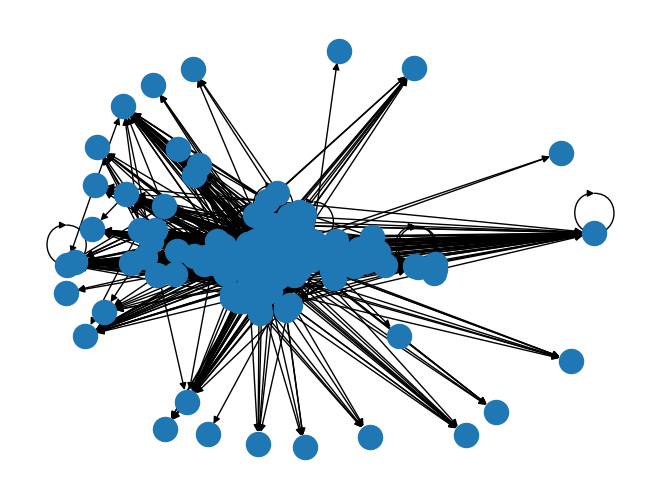

In [14]:
nx.draw(borealGraph)

In [15]:
# nx.draw(arcticGraph)

In [16]:
# collect the maximum total, in, and out degrees to see which species are the biggest predators or 
# prey in each environment. Below are tables giving the common name of each of these species to better
# understand the data

borealDegreesTotal = {}
borealDegreesIn = {}
borealDegreesOut = {}
for i, j in borealGraph.degree():
    borealDegreesTotal[borealNames[i]] = j
for i, j in borealGraph.in_degree():
    borealDegreesIn[borealNames[i]] = j
for i, j in borealGraph.out_degree():
    borealDegreesOut[borealNames[i]] = j

maximumDegreeBorealTotal = dict(sorted(borealDegreesTotal.items(), key=lambda item: item[1], reverse=True))
maximumDegreeBorealIn = dict(sorted(borealDegreesIn.items(), key=lambda item: item[1], reverse=True))
maximumDegreeBorealOut = dict(sorted(borealDegreesOut.items(), key=lambda item: item[1], reverse=True))
for i in range(10):
    names = list(maximumDegreeBorealTotal.keys())
    print(names[i], ': ', maximumDegreeBorealTotal[names[i]])
print()
for i in range(10):
    names = list(maximumDegreeBorealIn.keys())
    print(names[i], ': ', maximumDegreeBorealIn[names[i]])
print()
for i in range(10):
    names = list(maximumDegreeBorealOut.keys())
    print(names[i], ': ', maximumDegreeBorealOut[names[i]])

Gadus_morhua :  113
Melanogrammus_aeglefinus :  88
Sebastes_mentella :  62
Pandalus_borealis :  59
Clupea_harengus :  58
Paralithodes_camtschaticus :  55
Micromesistius_poutassou :  55
Detritus :  52
Calanus_finmarchicus :  52
Amblyraja_radiata :  50

Gadus_morhua :  82
Melanogrammus_aeglefinus :  65
Paralithodes_camtschaticus :  52
Amblyraja_radiata :  49
Sebastes_mentella :  49
Somniosus_microcephalus :  37
Micromesistius_poutassou :  35
Phocoena_phocoena :  32
Pollachius_virens :  31
Clupea_harengus :  30

Detritus :  52
Phytoplankton_indet :  47
Calanus_finmarchicus :  44
Calanus_hyperboreus :  39
Thysanoessa_inermis :  38
Pandalus_borealis :  36
Calanus_glacialis :  35
Polychaeta :  34
Diatom :  33
Mallotus_villosus :  33


The most interconnected trophospecies in the boreal sea (most total degree):  

|Scientific Name            |Common Name      |Degree |
|---------------------------|-----------------|-------|
|Gadus_morhua               |Atlantic cod     |113    |
|Melanogrammus_aeglefinus   |Haddock          |88     |
|Sebastes_mentella          |Beaked redfish   |62     |
|Pandalus_borealis          |Caridean shrimp  |59     |
|Clupea_harengus            |Atlantic herring |58     |
|Paralithodes_camtschaticus |Red king crab    |55     |
|Micromesistius_poutassou   |Blue whiting     |55     |
|Detritus                   |trash            |52     |
|Calanus_finmarchicus       |zooplankton      |52     |
|Amblyraja_radiata          |Thorny skate     |50     |

The most predatory trophospecies in the boreal sea (most in-degree):

|Scientific Name            |Common Name      |Degree |
|---------------------------|-----------------|-------|
|Gadus_morhua               |Atlantic cod     |82     |
|Melanogrammus_aeglefinus   |Haddock          |65     |
|Paralithodes_camtschaticus |Red king crab    |52     |
|Amblyraja_radiata          |Thorny skate     |49     |
|Sebastes_mentella          |Beaked redfish   |49     |
|Somniosus_microcephalus    |Greenland shark  |37     |
|Micromesistius_poutassou   |Blue whiting     |35     |
|Phocoena_phocoena          |Harbour porpoise |32     |
|Pollachius_virens          |Pollock          |31     |
|Clupea_harengus            |Atlantic herring |30     |

The most preyed upon trophospecies in the boreal sea (most out-degree):

|Scientific Name            |Common Name      |Degree |
|---------------------------|-----------------|-------|
|Detritus                   |trash            |52     |
|Phytoplankton_indet        |phytoplankton    |47     |
|Calanus_finmarchicus       |zooplankton      |44     |
|Calanus_hyperboreus        |copepod          |39     |
|Thysanoessa_inermis        |krill            |38     |
|Pandalus_borealis          |Caridean shrimp  |36     |
|Calanus_glacialis          |copepod          |35     |
|Polychaeta                 |worm             |34     |
|Diatom                     |algae            |33     |
|Mallotus_villosus          |Capelin          |33     |


In [17]:
# How many predators does the freaking shark have
print(borealDegreesOut['Somniosus_microcephalus'])

# what da freak is it
label = borealNameToLabel['Somniosus_microcephalus']

num = borealLabels.index(label) - 2
for i, j in borealGraph.edges:
    if (i == num):
        print(borealNames[i], borealNames[j])

# its canabalism

1
Somniosus_microcephalus Somniosus_microcephalus


In [18]:
arcticDegreesTotal = {}
arcticDegreesIn = {}
arcticDegreesOut = {}
for i, j in arcticGraph.degree():
    arcticDegreesTotal[arcticNames[i]] = j
for i, j in arcticGraph.in_degree():
    arcticDegreesIn[arcticNames[i]] = j
for i, j in arcticGraph.out_degree():
    arcticDegreesOut[arcticNames[i]] = j

maximumDegreeArcticTotal = dict(sorted(arcticDegreesTotal.items(), key=lambda item: item[1], reverse=True))
maximumDegreeArcticIn = dict(sorted(arcticDegreesIn.items(), key=lambda item: item[1], reverse=True))
maximumDegreeArcticOut = dict(sorted(arcticDegreesOut.items(), key=lambda item: item[1], reverse=True))
for i in range(10):
    names = list(maximumDegreeArcticTotal.keys())
    print(names[i], ': ', maximumDegreeArcticTotal[names[i]])
print()
for i in range(10):
    names = list(maximumDegreeArcticIn.keys())
    print(names[i], ': ', maximumDegreeArcticIn[names[i]])
print()
for i in range(10):
    names = list(maximumDegreeArcticOut.keys())
    print(names[i], ': ', maximumDegreeArcticOut[names[i]])

Detritus :  55
Phytoplankton_indet :  44
Boreogadus_saida :  42
Pandalus_borealis :  41
Calanus_finmarchicus :  37
Calanus_hyperboreus :  37
Themisto_libellula :  37
Mallotus_villosus :  35
Thysanoessa_inermis :  34
Polychaeta :  34

Chionoecetes_opilio :  28
Erignathus_barbatus :  27
Boreogadus_saida :  25
Alle_alle :  24
Anarhichas_lupus :  21
Pandalus_borealis :  20
Phoca_hispida :  19
Fulmarus_glacialis :  18
Amblyraja_hyperborea :  17
Hippoglossoides_platessoides :  17

Detritus :  55
Phytoplankton_indet :  44
Calanus_hyperboreus :  33
Polychaeta :  33
Themisto_libellula :  32
Calanus_finmarchicus :  29
Calanus_glacialis :  28
Thysanoessa_inermis :  28
Mallotus_villosus :  24
Diatom :  23


The most interconnected trophospecies in the arctic sea (most total degree):  

|Scientific Name            |Common Name      |Degree |
|---------------------------|-----------------|-------|
|Detritus                   |trash            |55     |
|Phytoplankton_indet        |phytoplankton    |44     |
|Boreogadus_saida           |Arctic cod       |42     |
|Pandalus_borealis          |Caridean shrimp  |41     |
|Calanus_finmarchicus       |zooplankton      |37     |
|Calanus_hyperboreus        |copepod          |37     |
|Themisto_libellula         |amphipod         |37     |
|Mallotus_villosus          |Capelin          |35     |
|Thysanoessa_inermis        |krill            |34     |
|Polychaeta                 |worm             |34     |

The most predatory trophospecies in the arctic sea (most in-degree):

|Scientific Name             |Common Name      |Degree |
|----------------------------|-----------------|-------|
|Chionoecetes_opilio         |Snow crab        |28     |
|Erignathus_barbatus         |Bearded seal     |27     |
|Boreogadus_saida            |Arctic cod       |25     |
|Alle_alle                   |sea bird         |24     |
|Anarhichas_lupus            |Atlantic wolffish|21     |
|Pandalus_borealis           |Caridean shrimp  |20     |
|Phoca_hispida               |Ringed seal      |19     |
|Fulmarus_glacialis          |Northern fulmar  |18     |
|Amblyraja_hyperborea        |Arctic skate     |17     |
|Hippoglossoides_platessoides|American plaice  |17     |

The most preyed upon trophospecies in the arctic sea (most in-degree):

|Scientific Name            |Common Name      |Degree |
|---------------------------|-----------------|-------|
|Detritus                   |trash            |55     |
|Phytoplankton_indet        |phytoplankton    |44     |
|Calanus_hyperboreus        |copepod          |33     |
|Polychaeta                 |worm             |33     |
|Themisto_libellula         |amphipod         |32     |
|Calanus_finmarchicus       |zooplankton      |29     |
|Fulmarus_glacialis         |Northern fulmar  |28     |
|Thysanoessa_inermis        |krill            |28     |
|Mallotus_villosus          |Capelin          |24     |
|Diatom                     |algae            |23     |

In [19]:
def calculateHamiltonian(graph, adjacency, spins, c, gamma):
    firstLoop = 0
    M = graph.number_of_edges()
    for i in range(len(adjacency[0])):
        for j in range(len(adjacency[0])):
            if (adjacency[i][j] > 0):
                if (spins[i] == spins[j]):
                    firstLoop += 1

    constant = gamma / (2 * M)
    
    secondLoop = 0
    for i in range(c):
        Ks = 0
        for j in spins.keys():
            if (spins[j] == i):
                Ks += graph.degree(j)
        secondLoop += (pow(Ks, 2) / 2)

    secondLoop *= constant
        
    return ((-1 * firstLoop) + secondLoop)

In [20]:
def changeInEnergy(graph, adjacency, spins, l, phi, alpha, gamma):
    if (phi == alpha):
        return "phi cannot equal alpha"
    
    first = 0
    for j in range(len(adjacency[0])):
        if (j != l): 
            if (phi == spins[j]):
                first += (adjacency[l][j])

    totalEdgeCount = 0
    for i in range(len(adjacency[0])):
        for j in range(len(adjacency[0])):
            totalEdgeCount += adjacency[i][j]

    totalEdgeCount *= 2
    
    groupEdgeCountPhi = 0
    groupEdgeCountAlpha = 0
    for i in spins.keys():
        if (spins[i] == phi):
            groupEdgeCountPhi += graph.degree(i)
        if (spins[i] == alpha):
            groupEdgeCountAlpha += graph.degree(i)
    second = gamma * (graph.degree(l) / totalEdgeCount) * (groupEdgeCountPhi - graph.degree(l))

    third = 0
    for j in range(len(adjacency[0])):
        if (j != l):
            if (alpha == spins[j]):
                third += adjacency[l][j]

    fourth = gamma * (graph.degree(l) / totalEdgeCount) * groupEdgeCountAlpha

    # print(first, second, third, fourth)
    return (first - second - third + fourth)

In [37]:
spins = {}
for i in range(len(borealAdjacency[0])):
    spins[i] = np.random.choice(range(4))

print(spins[0])

startHam = calculateHamiltonian(borealGraph, borealAdjacency, spins, 4, 1)
print(startHam)

hold = (spins[0] + 1) % 4
delta = changeInEnergy(borealGraph, borealAdjacency, spins, 0, spins[0], hold, 1)
print(delta)

spins[0] = hold
print(spins[0])

endHam = calculateHamiltonian(borealGraph, borealAdjacency, spins, 4, 1)
print(endHam, startHam + delta)


1
-375.529107373868
-2.0336351875808525
2
-383.5627425614489 -377.56274256144883


In [22]:
class Solution:
    def __init__(self, value, spins):
        self.value = value
        self.spins = spins

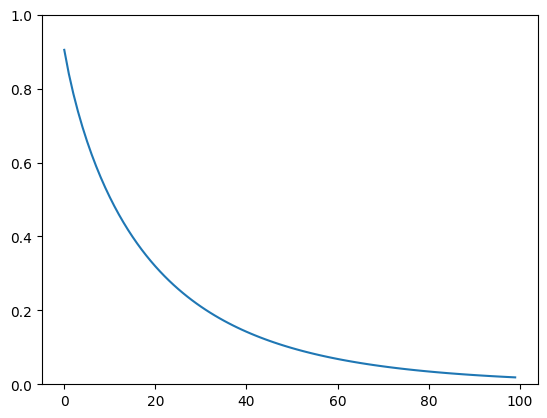

In [23]:
time = list(range(100))
temperature = [2/(tt+1)**.8 for tt in time]
paccept = [np.exp(-0.2/temp) for temp in temperature]

plt.plot(time, paccept)
plt.ylim([0,1])
plt.show()

In [24]:
# taken from lecture 11 Intro to AI
def schedule(time):
    C = 2
    p = 0.8
    temperature = C/(time+1)**p

    return temperature

In [46]:
def simulatedAnnealing(graph, adjacency, c, gamma):
    t = 0
    T = schedule(t)
    Tmin = 0.14
    numIterations = 1000
    numNodes = len(graph.nodes())

    spins = {}
    for i in range(len(adjacency[0])):
        spins[i] = np.random.choice(range(c))

    minimumSol = Solution(float('inf'), None)
    currentSol = Solution(calculateHamiltonian(graph, adjacency, spins, c, gamma), spins)

    #stopCounter = 0
    while (T > Tmin):
        print(T)
        #print("stop counter: ", stopCounter)
        #if (stopCounter > 15):
            #return minimumSol
        for i in range(numIterations):
                
            if (currentSol.value < minimumSol.value):
                minimumSol = currentSol
                #stopCounter = 0
                print(minimumSol.value)

            l = np.random.choice(list(range(numNodes)))
            minimumChange = float('inf')
            minimumIndex = ()
            for i in range(c):
                if (i != currentSol.spins[l]):
                    workingChange = changeInEnergy(graph, adjacency, currentSol.spins, l, currentSol.spins[l], i, gamma)
                    if (workingChange < minimumChange):
                        minimumChange = workingChange
                        minimumIndex = (currentSol.spins[l], i)

            newSpins = currentSol.spins.copy()
            newSpins[l] = minimumIndex[1]
            newSol = Solution(calculateHamiltonian(graph, adjacency, newSpins, c, gamma), newSpins)

            ap = math.exp((currentSol.value - newSol.value) / T)
            if (ap > random.uniform(0, 1)):
                currentSol = newSol

        t += 1
        T = schedule(t)
        #stopCounter += 1
        # print(T)
    
    return minimumSol

In [39]:
minimumSolBoreal = simulatedAnnealing(borealGraph, borealAdjacencySym, 4, 1)
print(minimumSol.spins)
print(minimumSol.value)

2.0
-459.5724450194049
-463.67820181112546
-468.1044631306597
-471.13615782664937
-475.54398447606724
-482.3486416558861
-487.2231565329883
-493.29333764553684
-501.2202457956015
-505.5184346701164
-516.1038163001293
-519.3023932729625
-520.6555627425614
-523.0177878395859
-523.0834411384217
-526.132276843467
-527.6199870633893
-530.9408150064683
-532.1355109961189
-535.7545278137128
-536.0054980595085
-537.8114489003881
-538.6555627425614
-545.2739327296248
-555.5640362225097
-558.869340232859
-567.5886157826649
-569.184023285899
-573.537192755498
-583.1154592496766
-583.8712807244501
-584.5646830530401
-587.6914618369987
-591.8260025873221
-592.211513583441
-598.4003880983182
-608.0061448900387
-610.7913971539456
-612.7836351875808
-617.3308538163001
-628.6798188874515
-630.780724450194
-635.0679172056921
-637.2170116429495
-639.7571151358344
-642.1804657179819
-642.3900388098318
-642.9867399741267
-657.2584087968952
-659.7512936610608
-666.7014877102199
-673.6620310478654
-676.72865

In [51]:
minimumSolArctic = simulatedAnnealing(arcticGraph, arcticAdjacencySym, 5, 1)
print(minimumSol.spins)
print(minimumSol.value)

2.0
-145.69516509433964
-146.02771226415095
-147.30955188679246
-150.3001179245283
-154.4487028301887
-156.4487028301887
-157.22228773584905
-161.4746462264151
-172.07841981132077
-174.41568396226415
-174.48408018867926
-178.342570754717
-180.40035377358492
-182.3696933962264
-187.3372641509434
-196.53537735849056
-201.07959905660377
-204.82134433962264
-208.4251179245283
-208.67040094339623
-215.05837264150944
-217.05129716981133
-223.6928066037736
-224.03950471698113
-228.0495283018868
-239.19516509433964
-240.74705188679246
-241.08018867924528
-243.16509433962264
-252.62087264150944
-254.6126179245283
-255.3119103773585
-259.94634433962267
-261.7859669811321
-266.0017688679245
-268.284787735849
-272.6043632075472
-272.7441037735849
-275.3808962264151
-277.61202830188677
-281.6049528301887
-285.12735849056605
-288.7635613207547
-288.8060141509434
-296.6055424528302
-298.9876179245283
-298.99705188679246
-299.03832547169816
-306.6680424528302
-310.48820754716985
-314.48349056603774
-3

In [49]:
def calculateModularity(graph, spins, c):
    L = graph.number_of_edges()
    total = 0
    numNodes = len(graph.nodes())
    for s in range(c):
        group = []
        for i in range(numNodes):
            if (spins[i] == s):
                group.append(i)

        linksBetweenS = 0
        for i in group:
            for j in list(graph.edges(i)):
                if (j[1] in group):
                    linksBetweenS += 1

        sumDegrees = 0
        for i in group:
            sumDegrees += graph.degree(i)

        total += ((linksBetweenS / L) - pow((sumDegrees / (2 * L)), 2))

    return total

In [40]:
modularityBoreal = calculateModularity(borealGraph, minimumSolBoreal.spins, 4)
print(modularityBoreal)

0.2706406299945274


In [52]:
modularityArctic = calculateModularity(arcticGraph, minimumSolArctic.spins, 5)
print(modularityArctic)

0.34735518089177647


In [29]:
spinsGreedy = {0: 2, 1: 2, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2, 7: 2, 8: 2, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 2, 15: 2, 16: 2, 17: 0, 18: 1, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 2, 26: 2, 27: 0, 28: 2, 29: 2, 30: 2, 31: 2, 32: 0, 33: 0, 34: 2, 35: 0, 36: 1, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 1, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 2, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 2, 65: 0, 66: 0, 67: 3, 68: 0, 69: 0, 70: 0, 71: 3, 72: 0, 73: 0, 74: 0, 75: 0, 76: 0, 77: 0, 78: 3, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 1, 87: 0, 88: 0, 89: 2, 90: 1, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 0, 101: 3, 102: 0, 103: 0, 104: 0, 105: 0, 106: 0, 107: 1, 108: 1, 109: 0, 110: 1, 111: 1, 112: 1, 113: 3, 114: 0, 115: 0, 116: 0, 117: 1, 118: 0, 119: 1, 120: 1, 121: 0, 122: 0, 123: 1, 124: 0, 125: 3, 126: 1, 127: 1, 128: 1, 129: 0, 130: 0, 131: 1, 132: 0, 133: 0, 134: 1, 135: 0, 136: 0, 137: 1, 138: 1, 139: 1, 140: 1, 141: 0, 142: 0, 143: 1, 144: 1, 145: 1, 146: 0, 147: 1, 148: 0, 149: 1, 150: 1, 151: 1, 152: 1, 153: 1,154: 1, 155: 0, 156: 1, 157: 0, 158: 1, 159: 1, 160: 1, 161: 0, 162: 1, 163: 3, 164: 1, 165: 3, 166: 3, 167: 3, 168: 3, 169: 3, 170: 3, 171: 1, 172: 3, 173: 1, 174: 3, 175: 3, 176: 3, 177: 3, 178: 3, 179: 3}

In [30]:
print(calculateModularity(borealGraph, spinsGreedy, 4))

-0.1102672422593715


In [44]:
saveBoreal = False
if (saveBoreal):
    saveGroupBoreal = open("groupsBoreal.txt", "a")
    saveGroupBoreal.write("{")
    
    for i in minimumSolBoreal.spins.keys():
        saveGroupBoreal.write(str(i) + ": " + str(minimumSolBoreal.spins[i]) + ", ")
        
    saveGroupBoreal.write("}")

1

In [57]:
saveArctic = False
if (saveArctic):
    saveGroupArctic = open("groupsArctic.txt", "a")
    saveGroupArctic.write("{")
    
    for i in minimumSolArctic.spins.keys():
        saveGroupArctic.write(str(i) + ": " + str(minimumSolArctic.spins[i]) + ", ")
        
    saveGroupArctic.write("}")

In [31]:
def drawGz(G,z):
    # DO NOT MODIFY THIS FUNCTION
    # This function draws G with node labels from partition z
    #
    # input  : G is a networkx graph
    #        : z is a dictionary of group labels for G's nodes
    # output : none
    # 
    # WARNING: function is optimistic: assumes inputs are properly formatted

    colors = ['#d61111','#11c6d6','#d67711','#11d646','#1b11d6','#d611cc'] # map node labels to colors (for the visualization)

    node_colors = []
    for i in G.nodes():
        node_colors.append(colors[int(z[i])])
    nsize  = 600
    flabel = True

    if G.order() > 50:
        nsize  = 100
        flabel = False
        
    nx.draw_networkx(G,with_labels=flabel,node_size=nsize,width=2,node_color=node_colors) # draw it pretty
    limits=plt.axis('off')                                      # turn off axes
    plt.show() 

    return

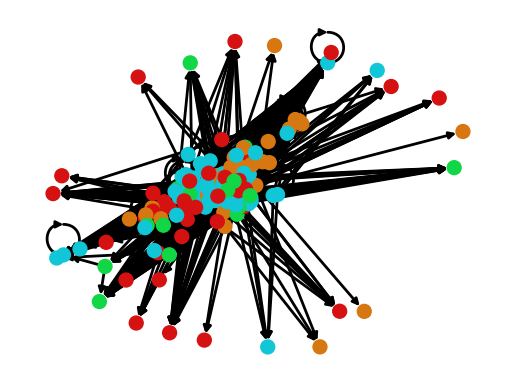

In [41]:
drawGz(borealGraph, minimumSol.spins)

In [66]:
def loadSpinsFromTxt(path):
    spinsFromFile = {}
    file = open(path, "r")
    line = file.read()

    index = 0
    for i in range(len(line)):
        if (line[i] == ':'):
            if (index < 10):
                spinsFromFile[int(line[i - 1])] = int(line[i + 2])
            elif (index < 100):
                first = int(line[i - 2] + line[i - 1])
                spinsFromFile[first] = int(line[i + 2])
            elif (index < 1000):
                first = int(line[i - 3] + line[i - 2] + line[i - 1])
                spinsFromFile[first] = int(line[i + 2])
            index += 1

    return spinsFromFile
        
    
    #Solution(calculateHamiltonian(graph, adjacency, spins, c, gamma), )

borealSpins = loadSpinsFromTxt("groupsBoreal.txt")
print(borealSpins)

<class 'str'>
{0: 2, 1: 2, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2, 7: 2, 8: 2, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 2, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 2, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 3, 39: 3, 40: 3, 41: 2, 42: 2, 43: 2, 44: 3, 45: 2, 46: 2, 47: 1, 48: 1, 49: 1, 50: 2, 51: 2, 52: 2, 53: 1, 54: 2, 55: 1, 56: 2, 57: 2, 58: 2, 59: 2, 60: 1, 61: 1, 62: 2, 63: 2, 64: 2, 65: 2, 66: 1, 67: 2, 68: 0, 69: 2, 70: 1, 71: 2, 72: 2, 73: 2, 74: 1, 75: 1, 76: 2, 77: 2, 78: 2, 79: 1, 80: 2, 81: 1, 82: 1, 83: 2, 84: 1, 85: 3, 86: 2, 87: 2, 88: 2, 89: 1, 90: 2, 91: 2, 92: 0, 93: 2, 94: 2, 95: 2, 96: 3, 97: 1, 98: 2, 99: 2, 100: 2, 101: 2, 102: 2, 103: 1, 104: 1, 105: 1, 106: 1, 107: 1, 108: 1, 109: 0, 110: 1, 111: 1, 112: 1, 113: 0, 114: 1, 115: 3, 116: 1, 117: 1, 118: 1, 119: 1, 120: 3, 121: 0, 122: 1, 123: 1, 124: 1, 125: 0, 126: 0, 127: 1, 128: 3, 129: 0, 130: 1, 131: 1, 132: 1, 133: 1, 134: 1, 135: 1, 136: 3,

In [100]:
def calculateZ(graph, spins, i):
    j = spins[i]
    partners = [i]
    k = []
    
    for x in spins.keys():
        if (spins[x] == j):
            partners.append(x)

    for x in range(len(partners)):
        k.append(0)
        for y in graph.edges(partners[x]):
            if (y[1] in partners):
                k[x] += 1

    kis = k[0]
    kMean = sum(k) / len(k)
    SDks = statistics.stdev(k)

    return (kis - kMean) / SDks

In [101]:
borealZ = {}
for i in borealSpins.keys():
    borealZ[i] = calculateZ(borealGraph, borealSpins, i)     

print(borealZ)

{0: 4.014690053791956, 1: 1.2678089880052525, 2: 1.1116092331099394, 3: 2.568271825294358, 4: 0.9537238301031663, 5: -0.015988589598003217, 6: -0.17901528749453421, 7: 2.568271825294358, 8: -0.17901528749453421, 9: 0.5833493067598535, 10: -0.6213415028320397, 11: -0.6213415028320397, 12: -0.48817290536346786, 13: -0.48817290536346786, 14: 2.889114726168847, 15: 2.1063208642423636, 16: 2.3395115444070314, 17: 0.04796307880294361, 18: -0.7539078063995258, 19: -0.503956413068021, 20: -0.48817290536346786, 21: -0.6213415028320397, 22: -0.22053723079744203, 23: -0.22053723079744203, 24: 0.9794086968595903, 25: 1.8661350918014667, 26: -0.6213415028320397, 27: -0.503956413068021, 28: 0.1822085088967899, 29: -0.3545285388874521, 30: 1.8661350918014667, 31: 0.1822085088967899, 32: 0.04796307880294361, 33: -0.3545285388874521, 34: 1.4939980476576122, 35: 0.5833493067598535, 36: -0.7539078063995258, 37: 1.109727158679721, 38: 1.7493943588674825, 39: 1.3049253575125457, 40: 1.949358868961793, 41: 

In [105]:
def calculatePC(graph, spins, i, c):
    ki = graph.degree(i)

    summation = 0
    for j in range(c):
        partners = []
        for x in spins.keys():
            if (spins[x] == j):
                partners.append(x)

        kit = 0
        for x in graph.edges(i):
            if (x[1] in partners):
                kit += 1

        summation += pow((kit / ki), 2)

    return (1 - summation)
    
    

        
        

In [106]:
borealPC = {}
for i in borealSpins.keys():
    borealPC[i] = calculatePC(borealGraph, borealSpins, i, 4)

print(borealPC)

{0: 0.5281065088757397, 1: 0.6611570247933884, 2: 0.3550295857988165, 3: 0.5436179981634527, 4: 0.7301587301587302, 5: 0.375, 6: 0.6799999999999999, 7: 0.6573110004526935, 8: 0.8284023668639053, 9: 0.6234567901234567, 10: 0.8611111111111112, 11: 0.8611111111111112, 12: 0.9081632653061225, 13: 0.826530612244898, 14: 0.6301775147928994, 15: 0.6035502958579881, 16: 0.6078961600865332, 17: 0.382716049382716, 18: 0.9977324263038548, 19: 0.75, 20: 0.9, 21: 0.75, 22: 0.8263888888888888, 23: 0.8263888888888888, 24: 0.8090859924283396, 25: 0.32396449704142005, 26: 0.5555555555555556, 27: 0.84, 28: 0.5416666666666667, 29: 0.5277777777777778, 30: 0.3402366863905325, 31: 0.2098765432098766, 32: 0.5950413223140496, 33: 0.8024691358024691, 34: 0.4288194444444444, 35: 0.8760330578512396, 36: 0.9722222222222222, 37: 0.728515625, 38: 0.7675619834710744, 39: 0.7842056932966024, 40: 0.7818559556786704, 41: 0.9090909090909091, 42: 0.9444444444444444, 43: 0.9444444444444444, 44: 0.765625, 45: 0.75, 46: 0.9